# 1. Network Insights
In order to address the problem of diffusion AI adoption, the network insights was conducted from the descriptive statistics, network structure and community detection. The network anlalysis and early adopter selections regarding to the diffusion of adoption was conducted based three assumptions. Recommendation and obstacles with solutions will be discussed later. In addition, interactive network plot were produced at the end in order to gain more information about the network and early adopters.


## 1. Descriptive Statistics
According to the descriptive statistics chart, we could perceive that the network is not a random network. It generally presents a positive trend of the centrality of the nodes in the observed network. It presents a variance increases with the increase of influential differences and some observations are outlined by eigenvector centrality algorithm, whereas there is no significant difference of existence hubs with high connectively since most of nodes connected with others are at the number of average degrees.  


## 2. Core-periphery and Community Detection
Core-periphery structure and community detection were used to analyse the modular structure to gain more insights of the network. There is no strong evidence to prove that there is a core-periphery in the observed network since there is no existence of the hubs with highly connectively on the top left of the heatmap.


As for community detection, the Girvan-Newman algorithm was used to identify the different communities of the network. The main objective of this procedure is to find the number of the communities with the highest modularity score. From Figure 3, we could observe that the modularity score increases rapidly till 0.7 when there are 7 communities in the network, whereas the score values with more than 7 communities really close to each other, which indicates that the optimum solution in the case is still with 7 communities.


## 3. Assumptions
To address the problem of diffusing AI, three assumptions were used to test if there is slightly difference between the average AI preference between (1) different communities; (2) different zones; (3) the connections of the nodes. The results (Figure 4) showed that communities 0 and 5 with higher average AI preference score than other communities; there is no significant difference between each zone or degrees of nodes towards AI preference.

# 2. The Analysis of Knowledge Exchange Network
The network plot of the AI knowledge exchange can be seen in Figure 5. The connections of each node do not present a concentration in the center and have similar number of connections in the network, it shows that degree connections do not have obvious relationship with AI preference.

The edge color represents the similarity of each two pairs of connections nodes. It presents that a similarity attribute between the two connected traders, which means the information exchanged between two traders do have similar attitudes towards AI.

The nodes’ color stands for the individual AI preference, yellow presents positive AI preference with score of 10. Generally, we could perceive that most of nodes do not clearly have AI preference, only relatively small part of nodes with strongly positive or negative attitudes, which indicates that most of traders in the network do not have enough knowledge of AI, or they might be confused about this new concept, thus they tend to hold neutral attitude.


# 3. The Physical Layout Network of the Trading Floor
The physical layout network presents the relationship between individual AI preference and their physical positions, including zones and communities. We could perceive that information exchange presents in the same communities and exists in difference communities and zones, but without strongly trend of the relation between the individual physical position and AI preference.

# 4. Recommendation of Promoting the Positive Opinion in the Network
As mentioned before, there is no significant difference between the number of connections and the AI preference, most of traders are confused about this new concept. The presence of the information exchange happened in the communities and zones. In addition, homogeneity was explored by homophily testing, which indicated that the individuals tend to be more similar in adopting behaviour to their network neighbours.

To solve the diffusion problem from business perspective, the first thing is to diffuse the AI knowledge and raising traders’ concerns to diffuse the AI information in the network effectively with lowest cost. Therefore, it is essential to select and target specific individuals to achieve the objective. In this case, we cannot select the individuals based on their degree centrality, because there is no significant relationship between AI preference and degree connections in previous analysis. 
We tried to use eigenvector centrality as an approach to find the early adopter with high influential in the network. In this procedure, we targeted the top three influential individuals in each community to diffuse the information rapidly within the communities. The plots with each community network present positive opinions also dispersed in each community to better diffuse in the community. From business perspective, AI information could be exchanged and diffused quickly, it is easier and effective, with lower cost to target 21 specific individuals, rather than the whole network to raising individuals’ concerns. The individuals with high eigenvector centrality in the network should be targeted as early adopter were shown with nodes labels. 

# 5. Obstacles in the Diffusion of AI Positive Opinions
Although the method of diffusing AI knowledge could solve problems to some extent, nodes with negative opinions are also included in this consideration, such as nodes 70 and 45. It is not worth to target them directly since there will be a potential risk to spread negative opinions through the network. If doing so, there might be a storm on AI knowledge opinions. 

Therefore, the obstacles here should be considered from two perspectives: (1) Targeted early adopters held with negative opinions; (2) Still existing clusters where neighbours are all holding negative opinions in each community. This is because the new behaviours cannot diffuse throughout the clusters since the homophily of the network.
To solve the obstacles, further analysis was adopted by selecting the AI preference above 5, indicating the individuals are more likely to adopt the AI innovation. Early adopter was selected by top three eigenvector centrality within each community holding positive AI opinions in order to achieve the objective at the beginning. 

Furthermore, some nodes with neutral attitudes could be targeted as a point to collapse the negative clusters to solve the second obstacles. For example, node 107 or 109 in community 0; node 179 or 168 in community 4 could be targeted as well. 

# 6. Conclusion
The network towards the AI preference displays a form of social influence with the subsequent effect on innovation adoption behaviours. After the analyse the structure of the network, 21 early adopters were selected as target individuals with positive preference and highly influential status in the network. In addition, four additional nodes should also be targeted to avoid a negative opinions clusters existing in the community. 

# Coding

In [1]:
#import libraries
from networkx.algorithms import similarity
from networkx.generators.community import gaussian_random_partition_graph
import pandas as pd
import numpy as np
from scipy.stats.morestats import _calc_uniform_order_statistic_medians
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import collections
from collections import Counter
import matplotlib.gridspec as gridspec
from graspologic.plot import heatmap

In [2]:
g = nx.read_graphml("trading_floor.xml")

In [3]:
# get the nodes attributes
attributes = dict(g.nodes.data())
ai = list(nx.get_node_attributes(g, "ai").values())
x_pos = list(nx.get_node_attributes(g, "x_pos").values())
y_pos = list(nx.get_node_attributes(g, "y_pos").values())

# 1. Network insights

## 1. Descriptive Statistics

In [4]:
#import libraries
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality

In [5]:
# visualization options
sns.set_theme(style="ticks")

# degree
degree = degree_centrality(g)

# eigenvector_centrality
ec = eigenvector_centrality(g)

# betweeness centrality
bc = betweenness_centrality(g)

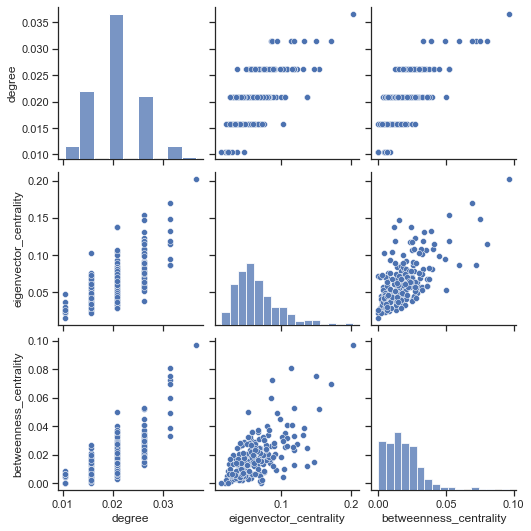

In [6]:
# visualize results
# --+ df
df_corr = pd.DataFrame({'degree': degree, 'eigenvector_centrality': ec,
                   'betweenness_centrality': bc})

# --+ correlation matrix
df_corr.corr()

# --+ scatter plot matrix
sns.pairplot(df_corr)

In [7]:
# ---+ Degree summary statistic
# Diameter 
print(' diameter: {}'.format(nx.diameter(g)))

 diameter: 9


## 2. Core-periphery

<AxesSubplot:>

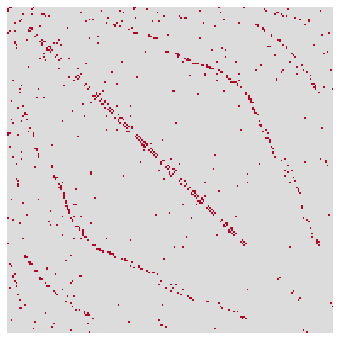

In [8]:
# --+ heatmap
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
heatmap(g, cmap='coolwarm', ax=ax, sort_nodes=True, cbar=False) 
#there is no strong evidence to prove there is a core-periphery in heatmap

## 3. Use Community Detection to Show a Modular Stucture

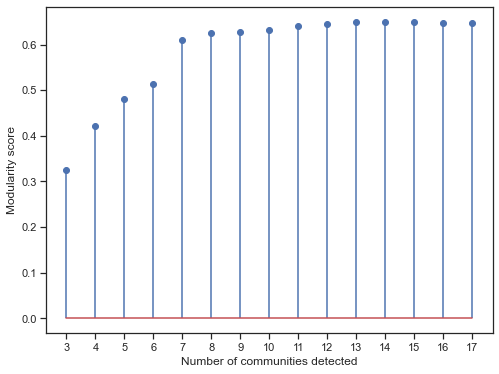

In [9]:
from networkx.algorithms.community import girvan_newman, modularity
import itertools
from pprint import pprint as pp
# use the modularity index to appreciate the quality of alternative
# paritioning solutions
# fit
solutions = girvan_newman(g)
# alternative paritioning solutions to consider
k = 1
# register modularity scores
modularity_scores = dict()
# iterate over solutions
for community in itertools.islice(solutions, k, 16):
    solution = list(sorted(c) for c in community)
    score = modularity(g, solution)
    modularity_scores[len(solution)] = score

# plot modularity data
fig = plt.figure(figsize=(8,6))
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()

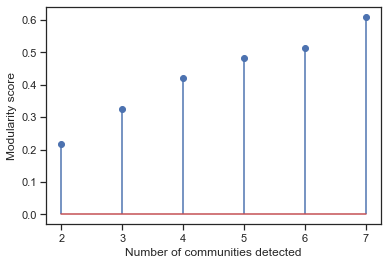

In [10]:
# --+ fit
solutions = nx.algorithms.community.girvan_newman(g)
# alternative paritioning solutions to consider
k = 6
# register modularity scores
modularity_scores = dict()
# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    score = nx.algorithms.community.modularity(g, solution)
    modularity_scores[len(solution)] = score
# plot modularity data
fig = plt.figure()
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()

# could observe that the modularity score are similiar 
# when there are more than 7 communities
# the modularity score is increasing rapidly till 0.7 when there are 7 communities in the network

## 4. Assumptions

In [11]:
# --+ (1). AI average in each community
comm_list = []
for i in range(0,193):
    for j in range(0,len(community)):
        string = str(i)
        if string in community[j]:
            comm_list.append(j)

# add communities attributes
for node,comm in zip(g.nodes, comm_list):
    g.nodes[node]["community"] = comm

# get the avg_ai preference in each community
ai_df= pd.DataFrame(list(zip(comm_list, ai)),
               columns =['Community', 'ai'])

ai_avg = ai_df.groupby(['Community']).mean()
ai_avg

,ai
Community,
0,5.210526
1,4.555556
2,4.000000
3,4.897436
4,4.396825
5,6.000000
6,4.766667


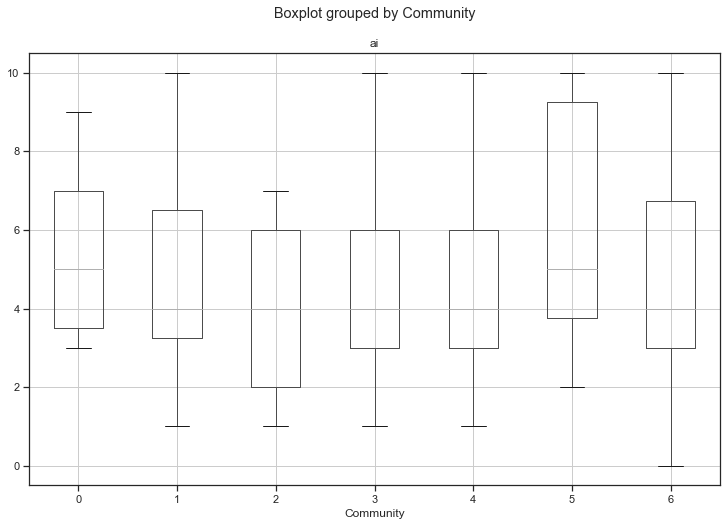

In [12]:
# show the boxplot
boxplot_ai = ai_df.boxplot('ai', by='Community', figsize=(12, 8))
# there is a difference between community 0 and community 5 with higher avg_ai preference score
# most of traders has netral attitude towards AI 
# (confused about the AI information or new behavior)

In [13]:
# %% --+ (2). AI perference with each Zone: 
# with 6 Zone: add new attritube
for node,v in g.nodes(data='x_pos'):
          if v == 1 or v == 2:
             g.nodes[node]['zone'] = 1
          elif v == 5 or v == 6:
             g.nodes[node]['zone'] = 2
          elif v == 9 or v == 10:
             g.nodes[node]['zone'] = 3
          elif v == 13 or v == 14:
                 g.nodes[node]['zone'] = 4
          elif v == 17 or v == 18:
                 g.nodes[node]['zone'] = 5
          else:
               g.nodes[node]['zone'] = 6
# get the attibutes of zone 
zone = list(nx.get_node_attributes(g, "zone").values())
zone_df= pd.DataFrame(list(zip(zone, ai)),
               columns =['Zone', 'ai'])

ai_avg_zone = zone_df.groupby(['Zone']).mean()
ai_avg_zone

,ai
Zone,
1,4.71875
2,5.06250
3,4.28125
4,5.00000
5,4.78125
6,4.28125


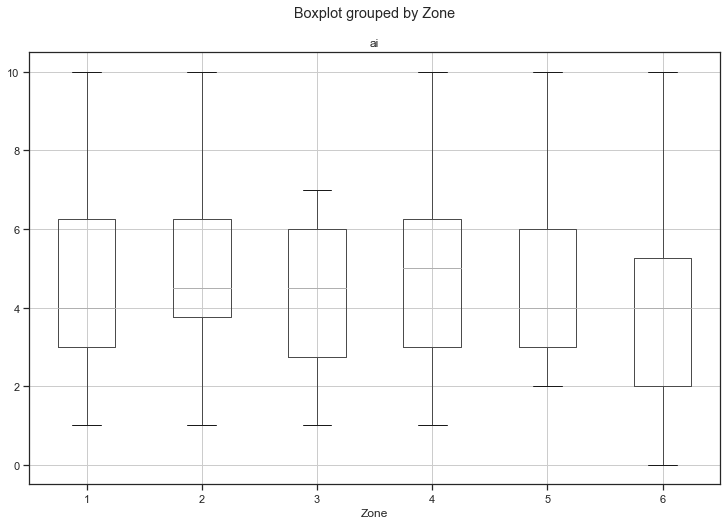

In [14]:
boxplot_zone = zone_df.boxplot('ai', by='Zone', figsize=(12, 8))
#there is no sigificant difference between each zone towards ai perference

In [15]:
# ---+(3). AI perference and nodes degree
for node,degree in zip(g.nodes, list(dict(g.degree()).values())):
    g.nodes[node]["degree"] = degree

#  get the degrees attributes to list
degree = list(nx.get_node_attributes(g, "degree").values())

degree_df = pd.DataFrame(list(zip(degree, ai)),
               columns =['Degree', 'ai'])

degree_avg = degree_df.groupby(['Degree']).mean()
degree_avg

,ai
Degree,
2,4.625000
3,4.441860
4,4.945652
5,4.375000
6,4.625000
7,5.000000


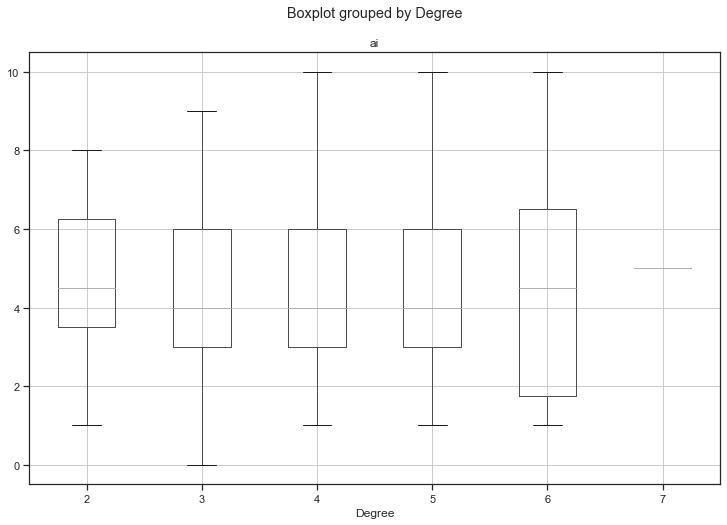

In [16]:
boxplot_degree = degree_df.boxplot('ai',by ='Degree',figsize=(12,8))
#there is no significant difference different degrees towards ai perference, netural attitudes

# 2. The Network of Knowledge Exchange

In [17]:
# plot the network of knowledge exchange
# --+ compute similiarity
similarity_list = []
for u,v in g.edges():
    value = np.abs(g.nodes[u]['ai'] - g.nodes[v]['ai'])
    similarity_list.append(value)

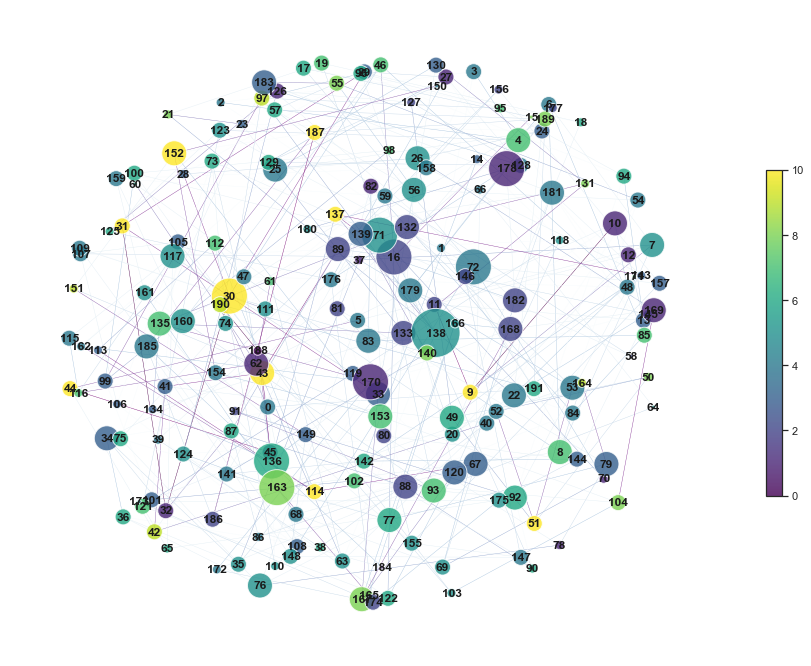

In [18]:
# --+ get insights of ai perference in the network
fig, ax = plt.subplots(figsize=(16,12))
pos = nx.spring_layout(g,k=0.8,seed = 5555) 
degrees = dict(g.degree)
edges = nx.draw_networkx_edges(g,pos=pos,edge_color =similarity_list,
                       edge_vmax= max(similarity_list),
                       edge_vmin=min(similarity_list),
                       edge_cmap = plt.cm.BuPu,
                       width=0.4) 


nodes = nx.draw_networkx_nodes(g, 
                       pos=pos, 
                       vmin=min(ai),
                       vmax=max(ai), 
                       node_size=[v ** 4 for v in degrees.values()],
                       cmap=plt.cm.viridis,
                       node_color= ai,edgecolors = 'white',
                       alpha=0.8)

nx.draw_networkx_labels(g,pos=pos, font_weight='bold')

ax.axis("off")

plt.colorbar(nodes,location = 'right', shrink = 0.5)
#plt.colorbar(edges,location ='right', shrink = 0.3)
plt.show()
#yellow: positive, purple:negative

# 3. The Physical Layout Network of the Trading Floor

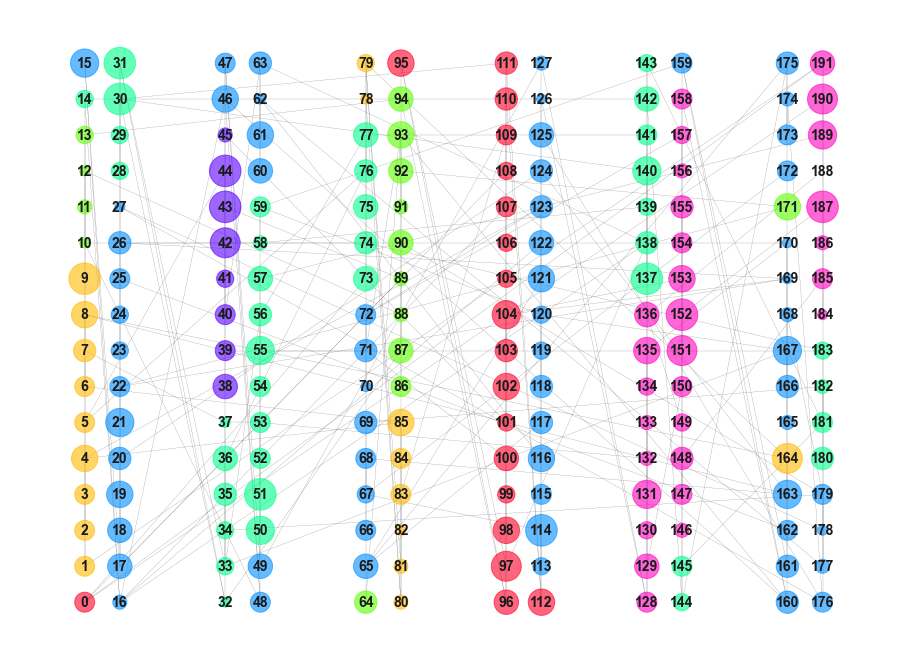

In [19]:
# plot the physical layout of the trading floor
x = dict([((u),d['x_pos']) for u, d in g.nodes(data=True)])
y = dict([((u),d['y_pos']) for u, d in g.nodes(data=True)])
keys = x.keys()
values = zip(x.values(), y.values())
pos1 = dict(zip(keys, values)) 

fig, ax = plt.subplots(figsize = (16,12))

nx.draw_networkx_edges(g,pos=pos1,width=0.2, edge_color='dimgray')

nodes = nx.draw_networkx_nodes(g, 
                       pos=pos1, 
                       node_size=[v *100 for v in ai], 
                       linewidths=1, 
                       node_color= comm_list,
                       cmap = plt.cm.gist_rainbow,
                       alpha=0.6)

nx.draw_networkx_labels(g,pos=pos1,font_size=14,font_weight='bold')
ax.axis("off")

#plt.legend(loc='upper right')
plt.show()

# 4. Recommendation of Promoting the Positive Opinion in the Network

## 1. Test the Presence of Homophily in the Network

In [20]:
# Homophily
edge = pd.DataFrame(g.edges())
edge = edge.rename(columns={0:'source',1:'target'})
# %% add adopt attributes based on AI perference
for node,v in g.nodes(data='ai'):
          if v >5:
              g.nodes[node]['adopt'] = 1
          else:
              g.nodes[node]['adopt'] = 0
#assume ai preference > 5 will adopt, otherwise, will not adopt
#%% Get the featrues of each node
# merge adopption of edges into dataframe
adoption_df = pd.DataFrame(g.nodes.data('adopt'))
adoption_df = adoption_df.rename(columns={0:'source',1:'adopt_s'})

temp_df =pd.merge(edge,adoption_df, on='source')

adoption_df_ = adoption_df.rename(columns={'source':'target', 'adopt_s':'adopt_t'})

adopt_df =pd.merge(temp_df,adoption_df_, on='target')

In [21]:
#%% Exploring homophily of the observed network in adoption AI
count_adopt = np.sum(adoption_df['adopt_s'])
n_nodes = len(g.nodes)
# proportion of nodes
p = count_adopt/n_nodes

# fill the adjacency matrix
adj = nx.adjacency_matrix(g)
G= adj.todense()
G = G.getA()

In [22]:
# %% count of the ties
adopt_df['counts'] = adopt_df['adopt_s'] + adopt_df['adopt_t']
c =Counter(adopt_df['counts'])

#count of adopt & adopt tie
c_aa = c[2]
#count of adopt & non adopt tie
c_an = c[1]
#count of non-adopt & non-adopt tie
c_nn = c[0]

In [23]:
# %% compare the focal network against 1,000 simulated networks

# define function
from scipy.spatial.distance import pdist
def assess_hompohily(_g,
                     _p,
                     _n,
                     _c_aa, _c_nn, _c_an,
                     _n_iterations):

    # fix seed
    np.random.seed(000)

    # containers
    # --+ count ties by type (homophilous Vs heterophilous)
    _r_aa, _r_an, _r_nn = 0, 0, 0
    # --+ distance between observed and simulated data
    _dist = []

    # iterate over simulated distribution of adopting
    for iteration in range(_n_iterations):
        _reshuffled = np.random.binomial(1, p, size=n_nodes)    #change the attribute the nodes in the ties, network stay here 
        # --+ iterate over each dyad in g
        for i in range(n_nodes):
            for j in range(n_nodes):
                # --+ sample the tie in the network
                t = [G[i][j]][0]
                # --+ if tie is present, evaluate whether it's a homphilous or
                # --- heterophilous tie based on the reshuffled network
                if t == 1:
                    h = np.sum([_reshuffled[i], _reshuffled[j]])    
                    if h == 2:
                        _r_aa += 1
                    elif h == 1:
                        _r_an += 1
                    elif h == 0:
                        _r_nn += 1
                    else:
                        pass
                else:
                    pass

        # get the distance between the observed and simulated distribution
        # of ties with respect to three following categories: (i)
        # adopt-adopt; (ii) adopt-non adopt; (iii) non adopt-non adopt. 

        _observed = np.array([c_aa, c_an, c_nn])
        _simulated = np.array([_r_aa, _r_an, _r_nn])
        to_append = pdist([_observed, _simulated], metric='cosine')   #computing the observing and simulating data
        _dist.append(to_append[0])

    # return statistics on the distance between the observed and siimulated
    # distributions of ties with respect to type (homophilopus Vs.
    # heterophilous)
    # --+
    _mean, _std, _min, _max = np.mean(_dist), np.std(_dist),\
                              np.min(_dist), np.max(_dist)
    print(80 * '-',
          'Descriptive statistics on observed-simulated ' \
          'distances',
          80 * '-',
          'Mean: %s' % np.round(_mean, 2),
          'Std. dev.: %s' % np.round(_std, 2),
          'Min: %s' % np.round(_min, 2),
          'Max: %s' % np.round(_max, 2),
          end='\n',
          sep='\n')
    # --+ plot the distribution of sum of squares
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(_dist,
            bins=50, cumulative=False, density=False,
            color='orange', alpha=0.5,
            histtype='bar')
    ax.set_xlabel(r'Cosine similarity') 
    ax.set_ylabel(r'Count of simulation runs')
    ax.set_title(r'Exploring homophily in graph G')
    # --+ save figure
    plt.tight_layout()
    plt.savefig('cosine_sim_distr.pdf')
    # --+ return objects
    return(_dist, [_mean, _std, _min, _max])

--------------------------------------------------------------------------------
Descriptive statistics on observed-simulated distances
--------------------------------------------------------------------------------
Mean: 0.0
Std. dev.: 0.0
Min: 0.0
Max: 0.01


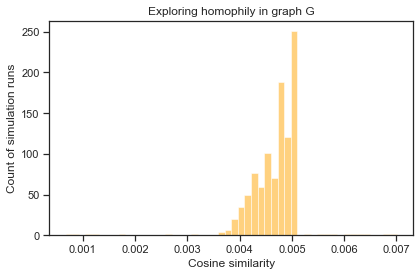

In [24]:
# deploy function
outcome = assess_hompohily(_g=G, _p=p, _n=n_nodes,
                           _c_nn=c_nn, _c_aa=c_aa, _c_an=c_an,_n_iterations=1000)

## 2. Find Early Adopter

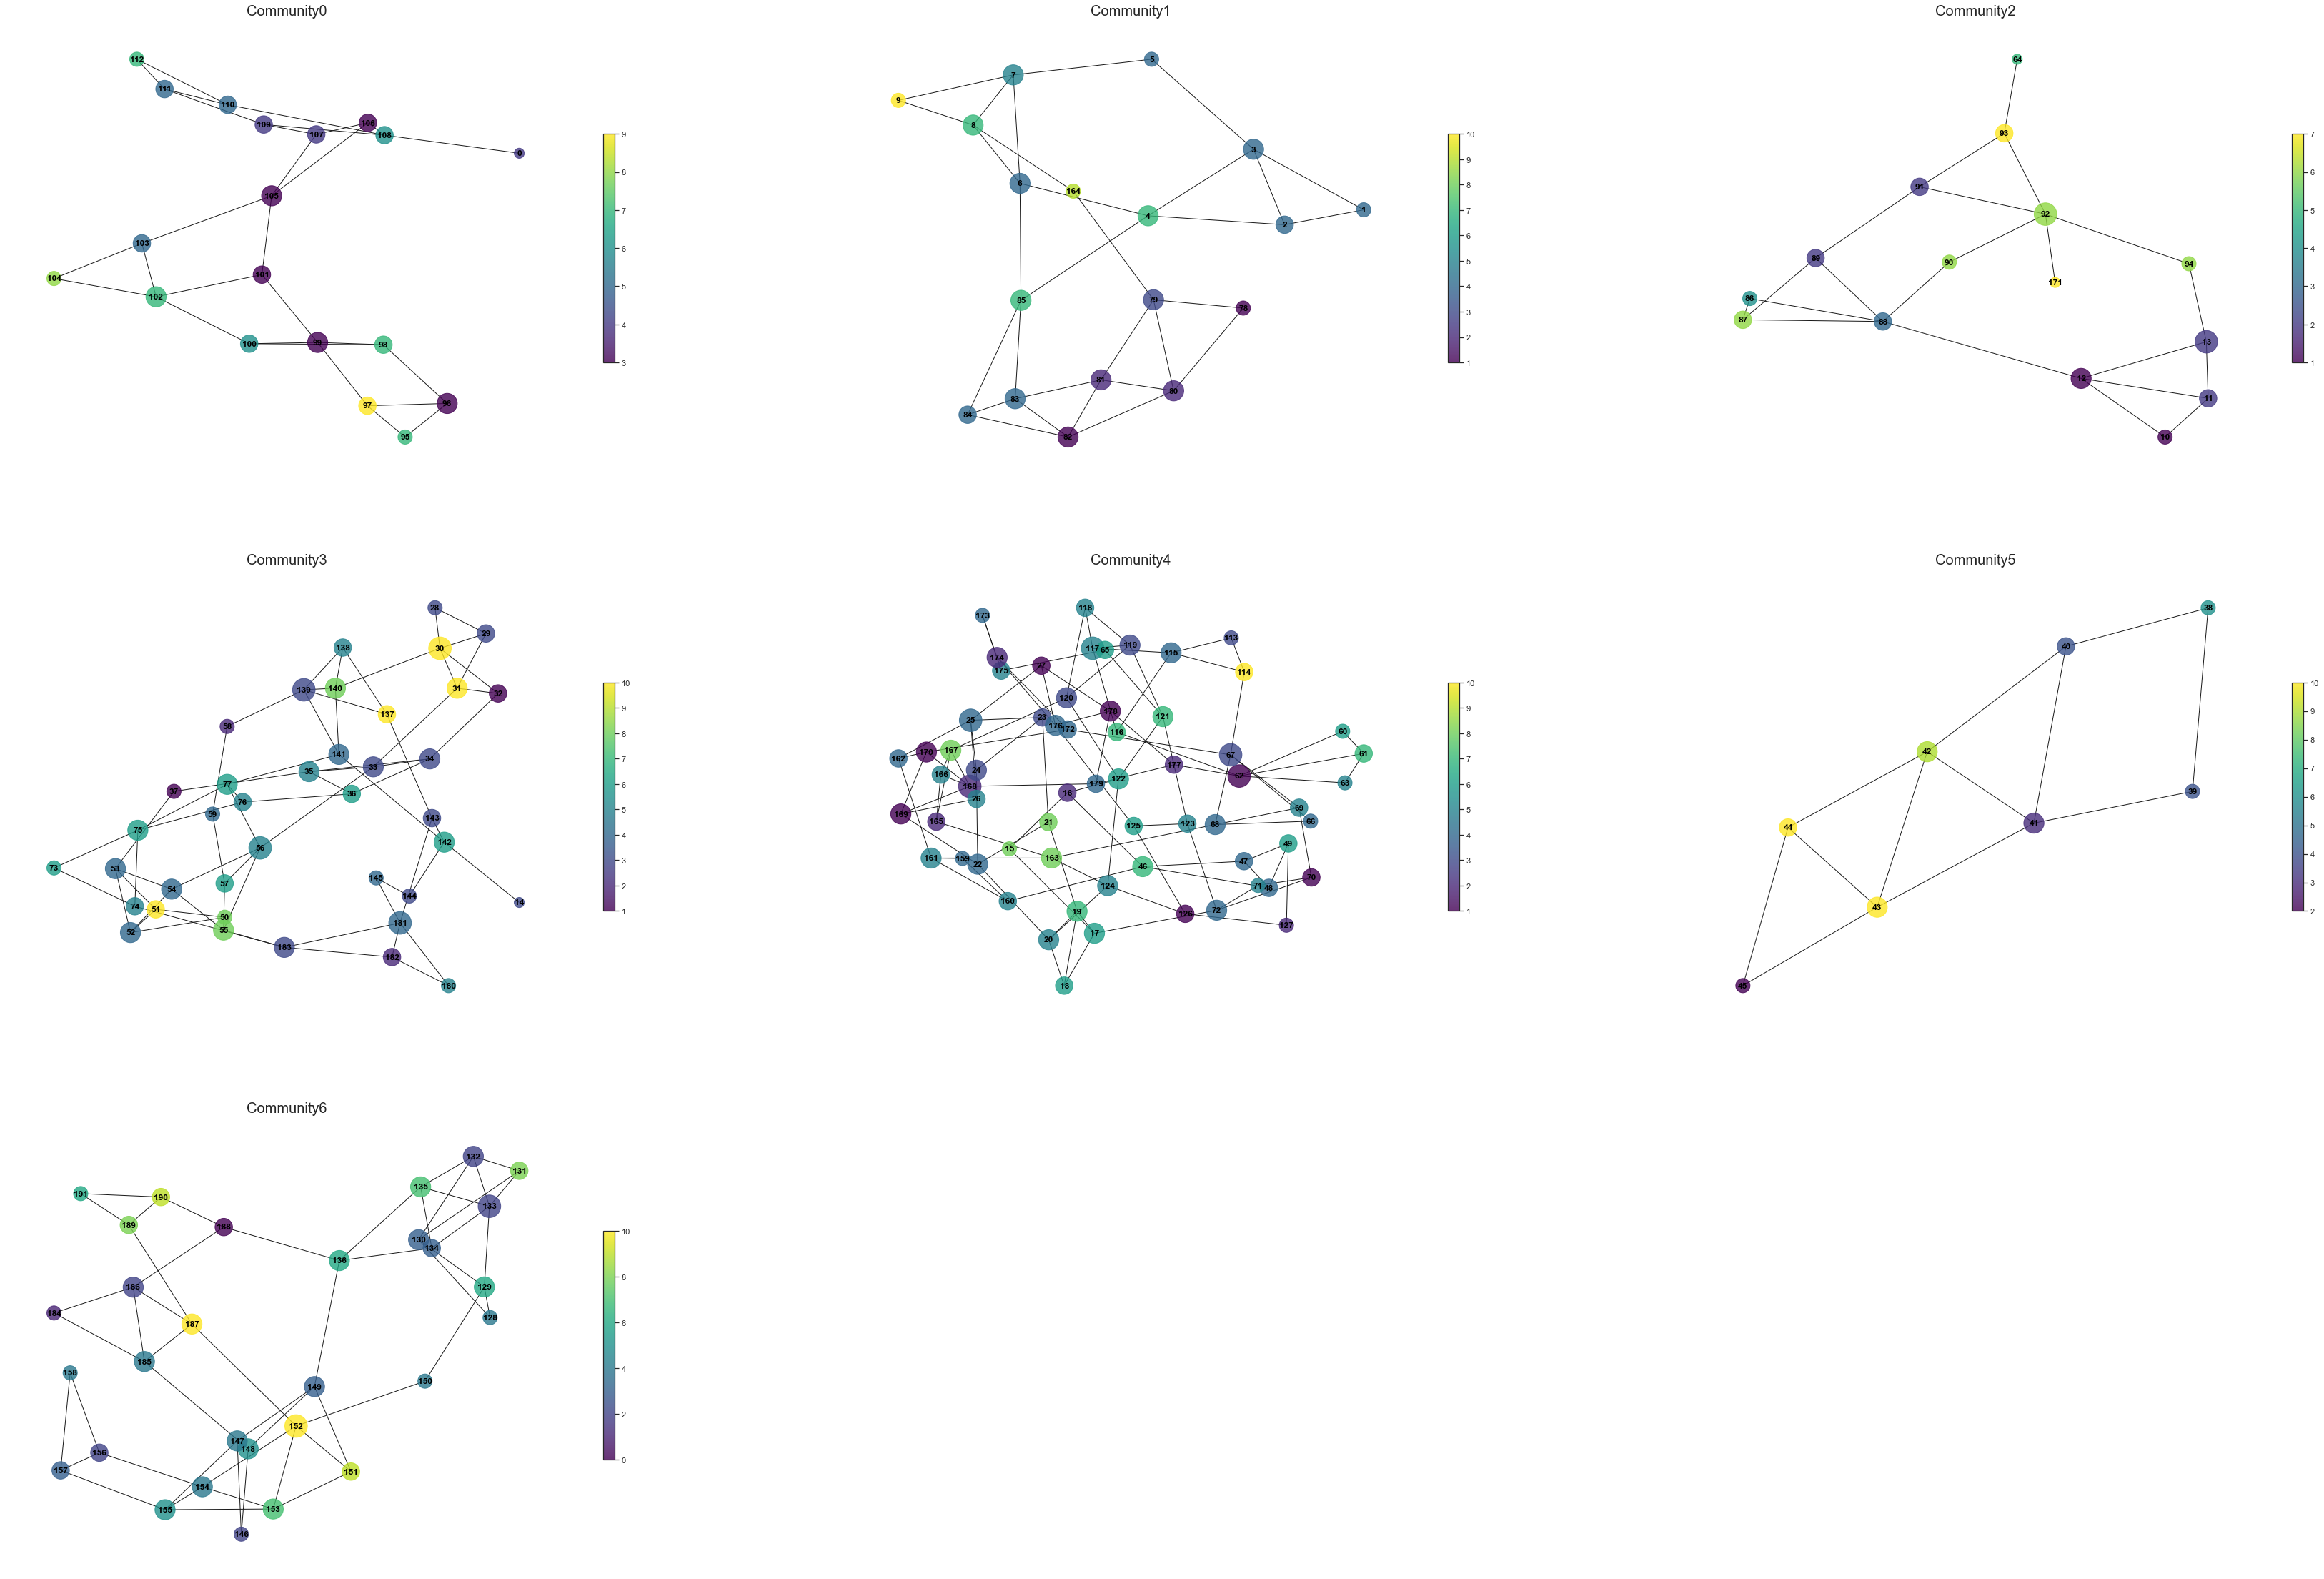

In [25]:
# Find Early adopter
# Define function to plot by community with 'yellow' early-adopters
def community1(i):
    ax = fig.add_subplot(3,3,i+1)
    G = g.subgraph(community[i])
    ai1 = list(nx.get_node_attributes(G, "ai").values())
    pos = nx.spring_layout(G,k=0.5,seed =688) 
    degree1 = dict(G.degree)
    nodes = nx.draw_networkx_nodes(G,pos,nodelist=community[i],node_color=ai1,
                                   node_size=[v * 200 for v in degree1.values()],
                                    cmap=plt.cm.viridis,
                                    alpha=0.8)
    edges = nx.draw_networkx_edges(G,pos)
    labels = nx.draw_networkx_labels(G,pos, font_weight='bold',font_color='black')
    plt.colorbar(nodes,location = 'right', shrink = 0.5)
    plt.title(f"Community{i}", fontsize = 20)
    ax.axis('off')
                     
fig = plt.figure(figsize=(60,40))
for i in range(0,7):
    community1(i)
plt.show()       

# 5. Obstacles in the Diffusion of AI Positive Opinions

In [26]:
# use eigenvector to find early adopter
# --+ add eigenvector to nodes attributes
for node, eigen in zip(g.nodes, list(ec.values())):
    g.nodes[node]['eigen'] = eigen

In [27]:
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality
import heapq

node_elements = []
for i in range(0,7):
    G = g.subgraph(community[i])
    eigenvector = zip(G.nodes(),list(nx.get_node_attributes(G,'eigen').values()))
    early_list = heapq.nlargest(3, eigenvector)
    for node in early_list:
        node_elements.append(node[0])

# give early adopter nodes color attribute
adopter_list = []
node_color1 = []
for node in g.nodes.keys():
    if node in node_elements:
        adopter_list.append(1)
        node_color1.append('yellow')
    else:
        adopter_list.append(0)
        node_color1.append('grey')

In [28]:
# early adopters selection regarding the positive AI opinions with high eigenvector centrality
ai_node_elements = []
for i in range(0,7):
    ai_node_list = []
    eig_val_list = []
    G = g.subgraph(community[i])
    G_new = dict((n,d['ai']) for n,d in G.nodes().items() if d['ai'] > 5)
    for ai_node in G_new.keys():
        for G_node, eig_val in zip(G,list(nx.get_node_attributes(G,'eigen').values())):
            if ai_node == G_node:
                ai_node_list.append(G_node)
                eig_val_list.append(eig_val)
        eigenvector = zip(eig_val_list, ai_node_list)
        early_list = heapq.nlargest(3, eigenvector)
    for node in early_list:
        ai_node_elements.append(node[1])

# give early adopter nodes color attribute
adopter_list = []
node_color2 = []
for node in g.nodes.keys():
    if node in ai_node_elements:
        adopter_list.append(1)
        node_color2.append('yellow')
    else:
        adopter_list.append(0)
        node_color2.append('grey')

In [29]:
def plot_network(node_elements_list):
    # Add node color and outline color to nodes
    outline_color = []
    # Using the 'yellow' to represent early-adopter, while the other are 'grey'
    # Using the outline colors of nodes to represent different community
    for node, n in g.nodes(data = 'community'):
        for i in range(len(community)):
            cm_color = plt.get_cmap("gist_rainbow")(1.*i/len(community))
            if n == i:
                outline_color.append(cm_color)

    # Plotting the network
    fig, ax = plt.subplots(figsize=(12,12))
    pos = nx.spring_layout(g,k=0.8,seed = 5555)
    nx.draw_networkx_edges(g,pos=pos,width=0.4) 
    tag = {}
    if node_elements_list == node_elements:
        node_color = node_color1
    else:
        node_color = node_color2
    for node in g.nodes():
        if node in node_elements_list:
            tag[node] = node
            nx.draw_networkx_nodes(g, pos=pos, node_size=[v *100 for v in ai], node_color = node_color, edgecolors = outline_color, linewidths = 1.5, alpha=0.8)
    nx.draw_networkx_labels(g, pos=pos, labels = tag, font_size = 14, font_weight='bold')
    ax.axis("off")
    return plt.show()

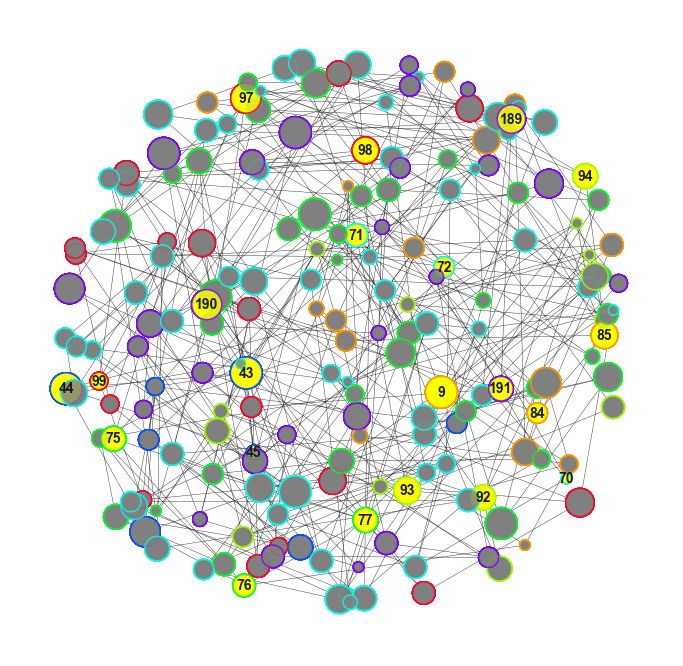

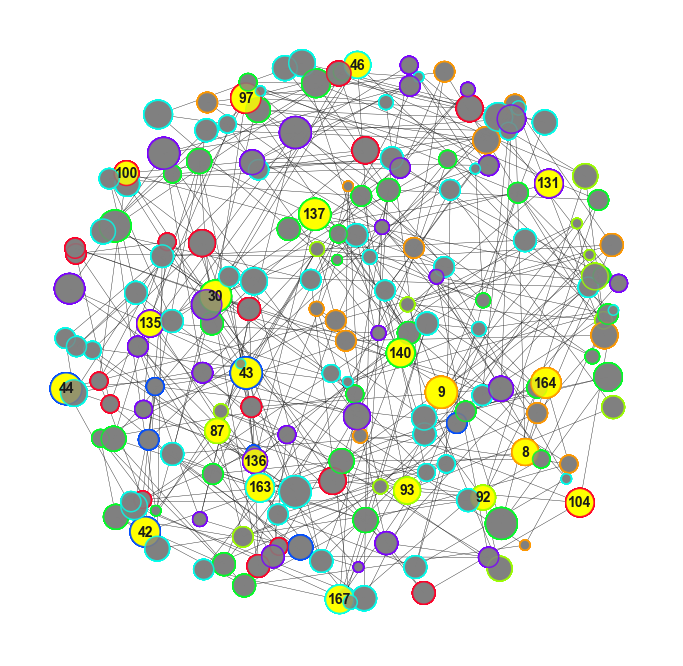

In [30]:
plot_list = [node_elements, ai_node_elements] #print the early adopters on the network 
for i in plot_list:
    plot_network(i)

# 6. Interactive Network Chart with Early Adopter Information

In [31]:
# Plotting the network by Bokeh with interactive information
import networkx as nx
from bokeh.plotting import from_networkx, show, output_file,save
from bokeh.models import (Circle, EdgesAndLinkedNodes, HoverTool, MultiLine, NodesAndLinkedEdges, Plot)
from bokeh.palettes import Spectral11
from bokeh.transform import linear_cmap


In [35]:
# Create the plot
plot = Plot(width=700, height=500,outline_line_color = None, title = "Network")
graph = from_networkx(g, nx.spring_layout, k=0.5,scale = 0.8, center = (0,0))
plot.add_tools(HoverTool(tooltips=None))

# Data preparing
graph.node_renderer.data_source.data['node_color'] = node_color2
graph.node_renderer.data_source.data['node'] = list(g.nodes())
graph.node_renderer.data_source.data['community'] = [i[1]['community'] for i in g.nodes(data=True)]
graph.node_renderer.data_source.data['preference'] = [i[1]['ai'] for i in g.nodes(data=True)]
graph.node_renderer.data_source.data['zone'] = [i[1]['zone'] for i in g.nodes(data=True)]
graph.node_renderer.data_source.data['degree'] = [i[1]['degree'] for i in g.nodes(data=True)]
graph.node_renderer.data_source.data['node_size'] = [3*i[1]['ai'] for i in g.nodes(data=True)]
graph.node_renderer.data_source.data['eigen'] = [i[1]['eigen'] for i in g.nodes(data=True)]

# Nodes setting
graph.node_renderer.glyph = Circle(size = 'node_size', fill_color = 'node_color', line_color = linear_cmap('community', 'Spectral11', min(comm_list), max(comm_list)), line_width = 5, line_alpha = 0.8)
graph.node_renderer.selection_glyph = Circle(size = 20, fill_color = Spectral11[2])
graph.node_renderer.hover_glyph = Circle(fill_color = 'lightblue', line_width = 0)

# Edges setting
graph.edge_renderer.glyph = MultiLine(line_color = "#CCCCCC", line_alpha = 0.6, line_width = 3)
graph.edge_renderer.selection_glyph = MultiLine(line_color = Spectral11[2], line_width = 3)
graph.edge_renderer.hover_glyph = MultiLine(line_color = Spectral11[1], line_width = 3)

# Interacting setting
graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = EdgesAndLinkedNodes()

# Interacting information
tooltips = [("Node", "@node"), 
            ("Community", "@community"), 
            ("Preference", '@preference'), 
            ("Zone", "@zone"),
            ("Degree", '@degree'),
            ("eigenvector", "@eigen")]

node_hover_tool = HoverTool(renderers=[graph.node_renderer], tooltips = tooltips)
plot.add_tools(node_hover_tool) 

plot.renderers.append(graph)
output_file('plot.html', mode='inline')
save(plot)
show(plot)